In [1]:
from functions.load_data import load_CIFAR_data, load_SVHN_data, load_MNIST_data
from custom_layers.initializers import BimodalNormalInitializer
from functions.models import trop_conv3layer_logits, relu_conv3layer
from functions.tests import test_pdg_steps
import os

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'  # Modify this path to your Graphviz installation directory

In [2]:
# -- MNIST data -- 
x_train, x_test, y_train, y_test = load_MNIST_data(desired_classes=[i for i in range(10)])
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(y_train.shape, y_test.shape)

trop_model = trop_conv3layer_logits(x_train, y_train, batch_size = 64, num_neurons_b4_logits = 64, initializer_w=BimodalNormalInitializer(1, 0, 0), lam = 1)

relu_model = relu_conv3layer(x_train, y_train, batch_size = 64, num_neurons_b4_logits = 64)

relu_model.evaluate(x_test, y_test)
file_path = f'output_data/MNIST_clear_experiment.csv'

test_pdg_steps(file_path, x_test, y_test, 
            min_steps = 1, max_steps = 41, step_size = 2, eps=0.1, 
            relu_model=relu_model, trop_model=trop_model)

(60000, 10)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 sequential (Sequential)     (None, 576)               55744     
                                                                 
 dense (Dense)               (None, 64)                36928     
                                                                 
 trop_embed_max_min_logits   (None, 10)                650       
 (TropEmbedMaxMinLogits)                                         
                                                                 
Total params: 93322 (364.54 KB)
Trainable params: 93322 (364.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Epoch 1/10


938/938 [==============================] - 17s 14ms/step

In [2]:
# -- SVHN data -- 
x_train, x_test, y_train, y_test = load_SVHN_data(desired_classes=[i for i in range(10)])
x_train = x_train.reshape(-1,32,32,3)
x_test = x_test.reshape(-1,32,32,3)
print(y_train.shape, y_test.shape)

trop_model = trop_conv3layer_logits(x_train, y_train, batch_size = 64, num_neurons_b4_logits = 64, initializer_w=BimodalNormalInitializer(1, 0, 0), lam = 1)

relu_model = relu_conv3layer(x_train, y_train, batch_size = 64, num_neurons_b4_logits = 64)

relu_model.evaluate(x_test, y_test)
file_path = f'output_data/SVHN_clear_experiment.csv'

test_pdg_steps(file_path, x_test, y_test, 
            min_steps = 1, max_steps = 41, step_size = 2, eps=4/255, 
            relu_model=relu_model, trop_model=trop_model)

(73257, 10) (26032, 10)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 1024)              56320     
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 trop_embed_max_min_logits   (None, 10)                650       
 (TropEmbedMaxMinLogits)                                         
                                                                 
Total params: 122570 (478.79 KB)
Trainable params: 122570 (478.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

Epoch 1/10


1145/1145 [==============================]

In [3]:
# -- CIFAR data -- 
x_train, x_test, y_train, y_test = load_CIFAR_data(desired_classes=[i for i in range(10)])
x_train = x_train.reshape(-1,32,32,3)
x_test = x_test.reshape(-1,32,32,3)
print(y_train.shape, y_test.shape)

trop_model = trop_conv3layer_logits(x_train, y_train, batch_size = 64, num_neurons_b4_logits = 64, initializer_w=BimodalNormalInitializer(1, 0, 0), lam = 1)

relu_model = relu_conv3layer(x_train, y_train, batch_size = 64, num_neurons_b4_logits = 64)

relu_model.evaluate(x_test, y_test)
file_path = f'output_data/CIFAR_clear_experiment.csv'

test_pdg_steps(file_path, x_test, y_test, 
            min_steps = 1, max_steps = 41, step_size = 2, eps=4/255, 
            relu_model=relu_model, trop_model=trop_model)

(50000, 10) (10000, 10)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential_2 (Sequential)   (None, 1024)              56320     
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 trop_embed_max_min_logits_  (None, 10)                650       
 1 (TropEmbedMaxMinLogits)                                       
                                                                 
Total params: 122570 (478.79 KB)
Trainable params: 122570 (478.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
782/782 [==============================] - 9s

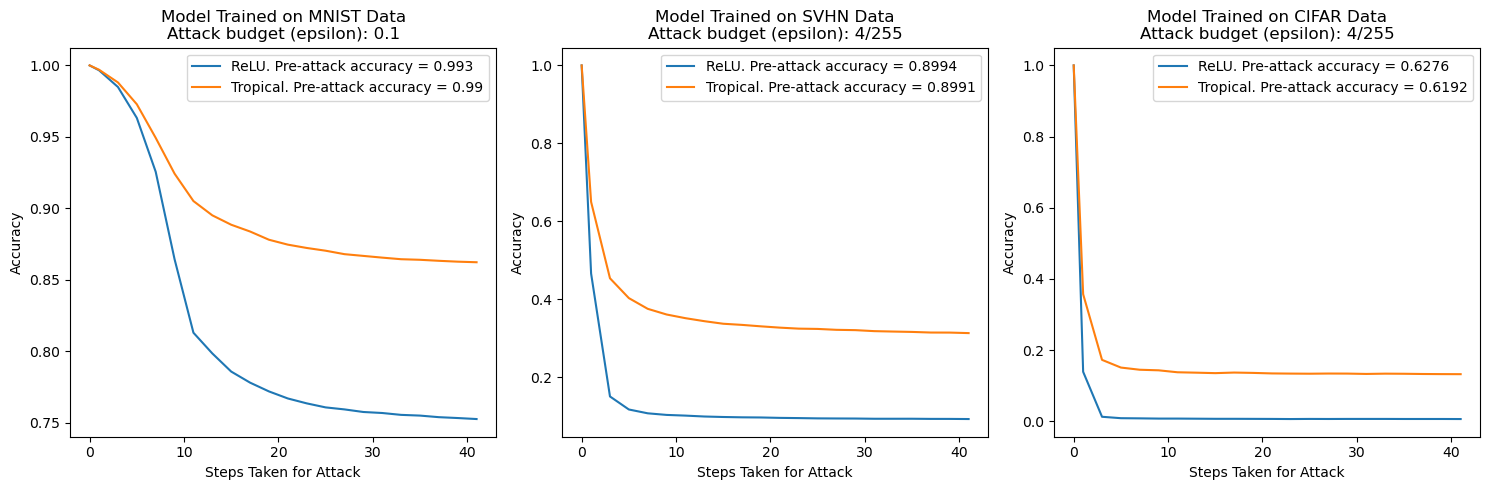

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV data
csv_files = ['output_data/MNIST_clear_experiment.csv', 'output_data/SVHN_clear_experiment.csv', 'output_data/CIFAR_clear_experiment.csv']  # Replace with your CSV file names

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Creating subplots side-by-side

datasets = ['MNIST', 'SVHN', 'CIFAR']
epsilons = ['0.1', '4/255', '4/255']
for i, file in enumerate(csv_files):
    data = pd.read_csv(file)
    
    # Separate data based on 'relu' and 'trop' labels
    relu_data = data[data['model_type'] == 'relu']
    trop_data = data[data['model_type'] == 'trop']
    
    # Plotting lines for 'relu' and 'trop' data
    axs[i].plot(relu_data['attack'], relu_data['maintained_correct_pred'], label=f'ReLU. Pre-attack accuracy = {round(list(relu_data["pre_acc"])[0],4)}')
    axs[i].plot(trop_data['attack'], trop_data['maintained_correct_pred'], label=f'Tropical. Pre-attack accuracy = {round(list(trop_data["pre_acc"])[0],4)}')
    
    axs[i].set_title(f'Model Trained on {datasets[i]} Data\nAttack budget (epsilon): {epsilons[i]}')
    axs[i].set_xlabel('Steps Taken for Attack')
    axs[i].set_ylabel('Accuracy')
    axs[i].legend()

plt.tight_layout()
plt.show()
